
#DACO Project - Neuronal Cells segmentation
Authors: Daniel Corona; Daniel Silva; Mariana Calado

#Drive Mounting and Verification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Create Classes

In [ ]:
import numpy as np
import csv
from PIL import Image
import os
csvfile=open(r"/content/drive/MyDrive/DACO/Datasets/train.csv")

csvreader=csv.reader(csvfile)
ids=[]
class_=[]
csv=[]
for row in csvreader:
  csv.append(row);
  ids.append(row[0])
  class_.append(row[4])

class_=np.array(class_).reshape(-1,1)
ids=np.array(ids).reshape(-1,1)

classes=np.concatenate([ids,class_],axis=1)

train=os.listdir('/content/drive/MyDrive/DACO/Datasets/train')

train=[x[:-4] for x in train]
cort_ids=[classes[x][0] for x in range(classes.shape[0]) if classes[x][1]=='cort']
astro_ids=[classes[x][0] for x in range(classes.shape[0]) if classes[x][1]=='astro']
shsy5y_ids=[classes[x][0] for x in range(classes.shape[0]) if classes[x][1]=='shsy5y']
cort_ids_f=[]
astro_ids_f=[]
shsy5y_ids_f=[]

[cort_ids_f.append(n) for n in cort_ids if n not in cort_ids_f] 
[astro_ids_f.append(n) for n in astro_ids if n not in astro_ids_f] 
[shsy5y_ids_f.append(n) for n in shsy5y_ids if n not in shsy5y_ids_f] 

cort=np.array(['cort' for x in range(len(cort_ids_f))]).reshape(-1,1)
astro=np.array(['astro' for x in range(len(astro_ids_f))]).reshape(-1,1)
shsy5y=np.array(['shsy5y' for x in range(len(shsy5y_ids_f))]).reshape(-1,1)

cort_ids_f=np.array(cort_ids_f).reshape(-1,1)
astro_ids_f=np.array(astro_ids_f).reshape(-1,1)
shsy5y_ids_f=np.array(shsy5y_ids_f).reshape(-1,1)


cort=np.concatenate([cort_ids_f,cort],axis=1)
astro=np.concatenate([astro_ids_f,astro],axis=1)
shsy5y=np.concatenate([shsy5y_ids_f,shsy5y],axis=1)

ids_classes=np.concatenate([cort,astro,shsy5y])

#Dataset Class Definition

In [ ]:
import os
import numpy as np
import torch
import skimage
from skimage import io
from PIL import Image

root_path = '/content/drive/MyDrive/DACO/Datasets'

#Class which allow iterate through images from the dataset
class SartoriusDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms

        #Load all training images and masks, sorting them to ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "train"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "train_mask"))))

    def __getitem__(self, idx):
        #Load images and masks
        img_path = os.path.join(self.root, "train", self.imgs[idx])
        mask_path = os.path.join(self.root, "train_mask", self.masks[idx])

        #Open image and mask
        img = io.imread(img_path)
        img = skimage.color.gray2rgb(img)
        mask = io.imread(mask_path)
        
        if self.transforms is not None:
            img =self.transforms(img)
            mask = self.transforms(mask)

        #return img, target
        return img, mask

    def __len__(self):
        return len(self.imgs)

#Class which allow iterate through images from the dataset
class SartoriusTestDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms

        #Load all training images and masks, sorting them to ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "test"))))

    def __getitem__(self, idx):
        #Load images and masks
        img_path = os.path.join(self.root, "test", self.imgs[idx])

        #Open image and mask
        img = io.imread(img_path)
        img = skimage.color.gray2rgb(img)
        
        if self.transforms is not None:
            img =self.transforms(img)

        #return img, target
        return img

    def __len__(self):
        return len(self.imgs)

#Dataset Class Definition for One Hot Encoding

In [ ]:
import os
import numpy as np
import torch
import skimage
from skimage import io
from PIL import Image

#Class which allow iterate through images from the dataset
class SartoriusDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms, id_classes):
        self.root = root
        self.transforms = transforms
        self.id_classes=id_classes
        #Load all training images and masks, sorting them to ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "train"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "train_mask"))))

    def __getitem__(self, idx):
        #Load images and masks
        
        img_path = os.path.join(self.root, "train", self.imgs[idx])
        mask_path = os.path.join(self.root, "train_mask", self.masks[idx])

        #Open image and mask
        img = io.imread(img_path)
        #img = skimage.color.gray2rgb(img)
        mask = io.imread(mask_path)
        
        zeros=np.expand_dims(np.zeros((520,704)),axis=-1)
        ones=np.expand_dims(np.ones((520,704)),axis=-1)
       
        if ids_classes[idx][1]=='cort':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,ones,zeros,zeros],axis=-1)
        if ids_classes[idx][1]=='astro':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,zeros,ones,zeros],axis=-1)
        if ids_classes[idx][1]=='shsy5y':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,zeros,zeros,ones],axis=-1)
        
        if self.transforms is not None:
            img =self.transforms(img)
            mask = self.transforms(mask)
        
        
        #return img, target
        return img, mask

    def __len__(self):
        return len(self.imgs)

#Class which allow iterate through images from the dataset
class SartoriusTestDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms

        #Load all training images and masks, sorting them to ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "test"))))

    def __getitem__(self, idx):
        #Load images and masks
        img_path = os.path.join(self.root, "test", self.imgs[idx])

        #Open image and mask
        img = io.imread(img_path)
        #img = skimage.color.gray2rgb(img)
        
        ones=np.expand_dims(np.ones((520,704)),axis=-1)
        zeros=np.expand_dims(np.zeros((520,704)),axis=-1)
        if ids_classes[idx][1]=='cort':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,ones,zeros,zeros],axis=-1)
        if ids_classes[idx][1]=='astro':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,zeros,ones,zeros],axis=-1)
        if ids_classes[idx][1]=='shsy5y':
            img = np.expand_dims(img, axis=-1)
            img=np.concatenate([img,zeros,zeros,ones],axis=-1)
        if self.transforms is not None:
            img =self.transforms(img)

        #return img, target
        return img

    def __len__(self):
        return len(self.imgs)

# U-Net Model

In [ ]:
import torch
from torch import nn
from torchvision import models


class UNET(nn.Module):
    def __init__(self,in_channels,init_features):
        super().__init__()         
        
        features=init_features
        
        # Construct the encoder blocks
        self.enc1 = double_conv(in_channels, features)       
        self.enc2 =  double_conv(features, features * 2)      
        self.enc3 = double_conv(features * 2, features * 4)       
        self.enc4 =double_conv(features * 4, features * 8)       
        self.bottleneck = b_conv(features * 8, features * 16)    
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)

        
        # Construct the decoder blocks
        self.dec1=dec(features*8)
        self.upconv1=upscale(features*16,features*8)
        self.dec2=dec(features*4)
        self.upconv2=upscale(features*8,features*4)
        self.dec3=dec(features*2)
        self.upconv3=upscale(features*4,features*2)
        self.dec4=dec(features)
        self.upconv4=upscale(features*2,features)
        self.conv=nn.Conv2d(features,1, kernel_size=1) #out
    
    def forward(self,x): #x input image
        # encoder
        enc1 = self.enc1(x)
        
        enc2 = self.enc2(self.pool(enc1))
        
        enc3 = self.enc3(self.pool(enc2))
        
        enc4 = self.enc4(self.pool(enc3))
        
        bottleneck = self.bottleneck(self.pool(enc4))
        
        dec1=self.upconv1(bottleneck)
        dec1=copy_crop(dec1,enc4)
        dec1=self.dec1(dec1)
        
        dec2=self.upconv2(dec1)
        dec2=copy_crop(dec2,enc3)
        dec2=self.dec2(dec2)
        
        dec3=self.upconv3(dec2)
        dec3=copy_crop(dec3,enc2)
        dec3=self.dec3(dec3)
        
        dec4=self.upconv4(dec3)
        dec4=copy_crop(dec4,enc1)
        dec4=self.dec4(dec4)
        
        out=self.conv(dec4) #out sigmoide
        
        return out
    def to_class(output):
        output=[1 if (x>0.5) else 0 for x in output]
  
        return output
def dec(feat):
    return nn.Sequential(
            nn.Conv2d(feat*2,feat,kernel_size=3,padding=1,bias=False),
            nn.BatchNorm2d(feat),
            nn.ReLU(),
            nn.Conv2d(feat,feat,kernel_size=3,padding=1,bias=False),
            nn.BatchNorm2d(feat),
            nn.ReLU()
            )
    
def upscale (in_f,out_f): 
    return nn.ConvTranspose2d(in_f, out_f,kernel_size=2,stride=2)
    
def copy_crop (dec,enc): 
    return torch.cat((dec,enc),dim=1)

def double_conv(in_c, out_c):
    conv_=nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=3,padding=1,bias=False),
        nn.BatchNorm2d(out_c),
        nn.ReLU(),
        nn.Conv2d(out_c, out_c, kernel_size=3,padding=1,bias=False),
        nn.BatchNorm2d(out_c),
        nn.ReLU()
        )
    return conv_



def b_conv(in_c, out_c):
    conv=nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=3,padding=1),
        nn.ReLU()
        )
    return conv

#U-Net Model with Dropout

In [ ]:
import torch
from torch import nn
from torchvision import models


class UNET(nn.Module):
    def __init__(self,in_channels,init_features):
        super().__init__()         
        
        features=init_features
        
        # Construct the encoder blocks
        self.enc1 = double_conv(in_channels, features)       
        self.enc2 =  double_conv(features, features * 2)      
        self.enc3 = double_conv(features * 2, features * 4)       
        self.enc4 =double_conv(features * 4, features * 8)       
        self.bottleneck = b_conv(features * 8, features * 16)    
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)

        # Construct the decoder blocks
        self.dec1=dec(features*8)
        self.upconv1=upscale(features*16,features*8)
        self.dec2=dec(features*4)
        self.upconv2=upscale(features*8,features*4)
        self.dec3=dec(features*2)
        self.upconv3=upscale(features*4,features*2)
        self.dec4=dec(features)
        self.upconv4=upscale(features*2,features)
        self.conv=nn.Conv2d(features,1, kernel_size=1) #out
    
    def forward(self,x): #x input image
        # encoder
        enc1 = self.enc1(x)
        
        enc2 = self.enc2(self.pool(enc1))
        
        enc3 = self.enc3(self.pool(enc2))
        
        enc4 = self.enc4(self.pool(enc3))
        
        bottleneck = self.bottleneck(self.pool(enc4))
        
        dec1=self.upconv1(bottleneck)
        dec1=copy_crop(dec1,enc4)
        dec1=self.dec1(dec1)
        
        dec2=self.upconv2(dec1)
        dec2=copy_crop(dec2,enc3)
        dec2=self.dec2(dec2)
        
        dec3=self.upconv3(dec2)
        dec3=copy_crop(dec3,enc2)
        dec3=self.dec3(dec3)
        
        dec4=self.upconv4(dec3)
        dec4=copy_crop(dec4,enc1)
        dec4=self.dec4(dec4)
        
        out=self.conv(dec4) 
        
        return out
    def to_class(output):
        output=[1 if (x>0.5) else 0 for x in output]
  
        return output
def dec(feat):
    return nn.Sequential(
            nn.Conv2d(feat*2,feat,kernel_size=3,padding=1,bias=False),
            nn.Dropout(0.2),
            nn.BatchNorm2d(feat),
            nn.ReLU(),
            nn.Conv2d(feat,feat,kernel_size=3,padding=1,bias=False),
            nn.Dropout(0.2),
            nn.BatchNorm2d(feat),
            nn.ReLU()
            )
    
def upscale (in_f,out_f):
    return nn.ConvTranspose2d(in_f, out_f,kernel_size=2,stride=2)
    
def copy_crop (dec,enc): 
    return torch.cat((dec,enc),dim=1)

def double_conv(in_c, out_c):
    conv_=nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=3,padding=1,bias=False),
        nn.Dropout(0.2),
        nn.BatchNorm2d(out_c),
        nn.ReLU(),
        nn.Conv2d(out_c, out_c, kernel_size=3,padding=1,bias=False),
        nn.Dropout(0.2),
        nn.BatchNorm2d(out_c),
        nn.ReLU()
        )
    return conv_



def b_conv(in_c, out_c):
    conv=nn.Sequential(
        nn.Conv2d(in_c, out_c, kernel_size=3,padding=1),
        nn.Dropout(0.2),
        nn.ReLU()
        )
    return conv

#Post-Processing Classifier

Creating data for the post process clasifier...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


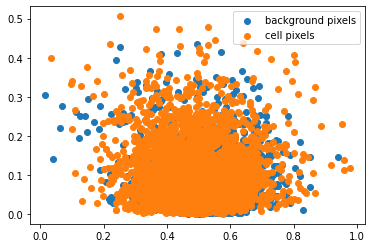

In [ ]:
import numpy as np
import skimage
from skimage import io
from skimage import transform
from sklearn.model_selection import train_test_split
from skimage import filters
from matplotlib import pyplot as plt
from sklearn.svm import SVC as SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from random import randint
import pandas as pd

class SkimageTransform(object):
    def __init__(self, new_size):
      self.new_size = new_size
    def __call__(self, img):
        img = transform.resize(img, self.new_size)
        img = skimage.color.rgb2gray(img)
        return img

#Path to dataset
root_path = '/content/drive/MyDrive/DACO/Datasets'

#Create transform
transform_ = SkimageTransform((512,512))

#Dataset settings
dataset = SartoriusDataset(root_path, transform_)

X = []
label = []
data_size = 200

print('Creating data for the post process clasifier...')
for i in range(data_size):
  img, mask = dataset[i]
  img_edge = filters.sobel(img)

  if((i*100/data_size)%10 == 0):
    print(i*100/data_size,'%')
  
  counter = 0
  start = randint(1,mask.shape[0]-100)
  x = start
  n_points_per_img = 50

  while(x >= start and x < mask.shape[1] and counter < n_points_per_img):
    for y in range(1,mask.shape[1]-1):
      sum_neighborhood = mask[x+1][y] + mask[x-1][y] + mask[x][y+1] + mask[x][y-1] + mask[x+1][y+1] + mask[x+1][y-1] + mask[x-1][y-1] + mask[x-1][y+1]
      if(mask[x][y] == 0) and (sum_neighborhood > 0):
        X.append([img[x][y], img_edge[x][y]])
        label.append(mask[x][y])
        counter += 1
      elif(mask[x][y] == 1) and (sum_neighborhood < 8):
        X.append([img[x][y], img_edge[x][y]])
        label.append(mask[x][y])
        counter += 1
      if counter >= n_points_per_img:
        break
    x += 1
X = np.array(X)
label = np.array(label)

plt.figure()
plt.scatter(X[label==0][:,0], X[label==0][:,1], label='background pixels')
plt.scatter(X[label==1][:,0], X[label==1][:,1], label='cell pixels')
plt.legend()
plt.show()

In [ ]:
import os
import pickle

best_svm_acc = 0
best_bayes_acc = 0
for i in range(10): 
  print(f"Training {i+1}") 
  X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)

  svm_model = SVM(C=3, kernel='poly', degree=3)
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  #print(f"SVM Model performance - Accuracy = {acc}; Precision = {precision_score(y_test, y_pred)}; Recall = {recall_score(y_test, y_pred)}")
  if(acc > best_svm_acc):
    best_svm_acc = acc
    model_path = '/content/drive/MyDrive/DACO/Post_Processing/svm_model.sav'
    # save the model to disk
    if os.path.exists(model_path):
      os.remove(model_path)
    pickle.dump(svm_model, open(model_path, 'wb'))

  bayes_model = GaussianNB()
  bayes_model.fit(X_train, y_train)
  y_pred = bayes_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  #print(f"Gaussian Bayes Model performance - Accuracy = {acc}; Precision = {precision_score(y_test, y_pred)}; Recall = {recall_score(y_test, y_pred)}")
  if(acc > best_bayes_acc):
    best_bayes_acc = acc
    model_path = '/content/drive/MyDrive/DACO/Post_Processing/bayes_model.sav'
    # save the model to disk
    if os.path.exists(model_path):
      os.remove(model_path)
    pickle.dump(bayes_model, open(model_path, 'wb'))

print(f"Best SVM accuracy = {best_svm_acc}")
print(f"Best Gaussian Bayes accuracy = {best_bayes_acc}")

Training 1
Training 2
Training 3
Training 4
Training 5
Training 6
Training 7
Training 8
Training 9
Training 10
Best SVM accuracy = 0.67
Best Gaussian Bayes accuracy = 0.665


#Model Validation with Post Processing

Cuda isn't available! Training on CPU
Testing model...


  0%|          | 0/61 [00:00<?, ?it/s]

Tunning boundary between cells and background...
4.999542236328125 %
4.9999237060546875 %
5.00030517578125 %
9.999847412109375 %
10.000228881835938 %
14.999771118164062 %
15.000152587890625 %
19.99969482421875 %
20.000076293945312 %
20.000457763671875 %
25.000381469726562 %
29.999542236328125 %
29.999923706054688 %
30.00030517578125 %
34.999847412109375 %
35.00022888183594 %
39.99977111816406 %
40.000152587890625 %
44.99969482421875 %
45.00007629394531 %
45.000457763671875 %
50.00038146972656 %
59.999847412109375 %
60.00022888183594 %
64.99977111816406 %
65.00015258789062 %
69.99969482421875 %
70.00007629394531 %
70.00045776367188 %
75.00038146972656 %
79.99954223632812 %
79.99992370605469 %
80.00030517578125 %
84.99984741210938 %
85.00022888183594 %
89.99977111816406 %
90.00015258789062 %
94.99969482421875 %
95.00007629394531 %
95.00045776367188 %


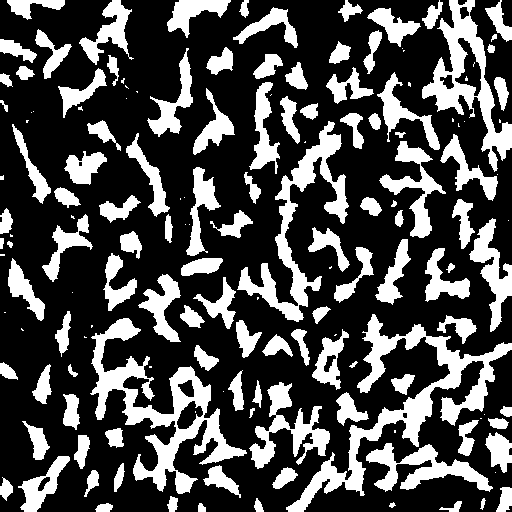

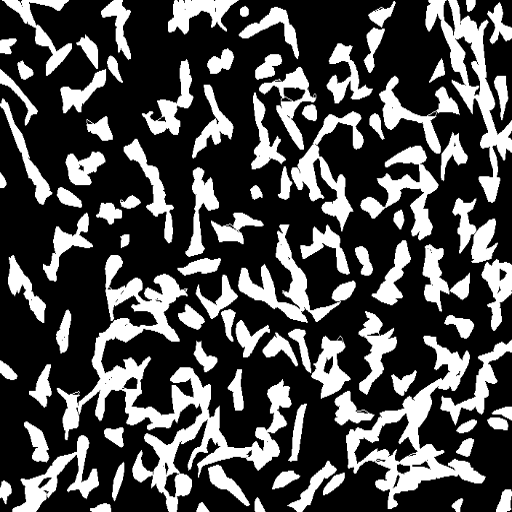

  0%|          | 0/61 [00:35<?, ?it/s]



IoU = 0.676357056694813 Dice = 0.25666809081982295 Accuracy = 0.882736868175494


In [ ]:
import numpy as np
import torch
from PIL import Image
from torch import nn
import skimage
from skimage import io
from skimage import transform
from skimage import filters
from skimage import morphology
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import SequentialSampler
from tqdm import tqdm
import copy
import pickle

pil = transforms.ToPILImage()

def IoU(outputs, labels):
  outputs = outputs.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  outputs = np.reshape(outputs, (1,-1)) 
  labels = np.reshape(labels, (1,-1))
  intersection = np.logical_and(labels, outputs)
  union = np.logical_or(labels, outputs)
  iou_score = np.sum(intersection) / np.sum(union)
  return iou_score

def dice_score(output, label):
    smooth = 1e-6
    output = output.detach().cpu().numpy()
    label = label.detach().cpu().numpy()
    output = np.reshape(output, (1,-1))
    label = np.reshape(label, (1,-1))
    intersection = np.logical_and(label, output)
    
    return ((2 * np.sum(intersection)) /
              (label.shape[1] + output.shape[1] + smooth))
    
def accuracy_score(outputs, labels):
  outputs = outputs.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  outputs = np.reshape(outputs, (1,-1)) 
  labels = np.reshape(labels, (1,-1))
  intersection = np.logical_and(labels, outputs)
  union = np.logical_or(labels, outputs)
  outputs = 1 - outputs
  labels = 1 - labels
  n_intersection = np.logical_and(labels, outputs)
  acc_score = (np.sum(intersection) + np.sum(n_intersection)) / (np.sum(union) + np.sum(n_intersection))
  return acc_score

model = UNET(3,32)
model.load_state_dict(torch.load('/content/drive/MyDrive/DACO/Results/Unet/model.pth', map_location=torch.device('cpu')))

model_path = '/content/drive/MyDrive/DACO/Post_Processing/svm_model.sav'
svm = pickle.load(open(model_path, 'rb'))

#Path to dataset
root_path = '/content/drive/MyDrive/DACO/Datasets'
#Create transforms and compose
composed_transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((512,512)) ])

#Dataset settings
#dataset = SartoriusDataset(root_path, composed_transform, ids_classes)
dataset = SartoriusDataset(root_path, composed_transform)

idx = [*range(len(dataset))]
training_idx, test_idx = train_test_split(idx, test_size = 0.2, shuffle=False)

test_sampler = SequentialSampler(test_idx)

batch_size = 2
test_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=0)

#Check if GPU is available for training
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
  print("Cuda is available! Training on GPU")
  model.cuda()
else:
  print("Cuda isn't available! Training on CPU")

#Validation loop
model.eval()
print('Testing model...')

t_IoU = 0
t_dice = 0
t_acc = 0

for i, (img,mask) in enumerate(tqdm(test_dataloader)):
  
  if train_on_gpu:
    img, mask = img.cuda(), mask.cuda()

  #Feedforward
  output = model(img.float())

  img = img.detach().cpu().numpy()[0][0]
  img_edge = filters.sobel(img)

  out = torch.round(torch.sigmoid(output))

  out = out.detach().cpu().numpy()
  for j in range(1):
    out[j][0] = morphology.closing(out[j][0], np.ones((3, 3)))
  out = torch.from_numpy(out)


  pixels_to_change = []
  for j in range(1):
    out2 = out[j][0]
    print("Tuning boundary between cells and background...")
    for x in range(1,out2.shape[0]-1):
      for y in range(1,out2.shape[1]-1):
        if((np.round((x*512+y)/(512*512),5)*100)%5 == 0):
          print((x*512+y)*100/(512*512), '%')
        neighborhood = out2[x+1][y] + out2[x-1][y] + out2[x][y+1] + out2[x][y-1] + out2[x+1][y+1] + out2[x+1][y-1] + out2[x-1][y-1] + out2[x-1][y+1]
        if(out2[x][y] == 0) and (neighborhood > 0):
          y_pred = svm.predict(np.array([[img[x][y], img_edge[x][y]]]))
          if y_pred == 1:
            pixels_to_change.append([x,y])
  

    for pixel in pixels_to_change:
      out[j][0][pixel[0]][pixel[1]] = 1 - out2[pixel[0]][pixel[1]]

  out = out.detach().cpu().numpy()
  for j in range(1):
    out[j][0] = morphology.closing(out[j][0], np.ones((3, 3)))
  out = torch.from_numpy(out)

  #Save IoU and Dice
  for j in range(1):
    t_IoU += IoU(out[j][0],mask[j][0])
    t_dice += dice_score(out[j][0],mask[j][0])
    t_acc += accuracy_score(out[j][0],mask[j][0])

  if i%50 == 0:
    display(pil(out[0][0]))
    print('\n')
    display(pil(mask[0][0]))
    break

#Average IoU and Dice metrics
#t_IoU = t_IoU/len(test_dataloader.sampler)
#t_dice = t_dice/len(test_dataloader.sampler)

print('\n')
print(f'IoU = {t_IoU} Dice = {t_dice} Accuracy = {t_acc}')

#Model Validation without Post Processing

Cuda is available! Training on GPU
Testing model...


  0%|          | 0/61 [00:00<?, ?it/s]

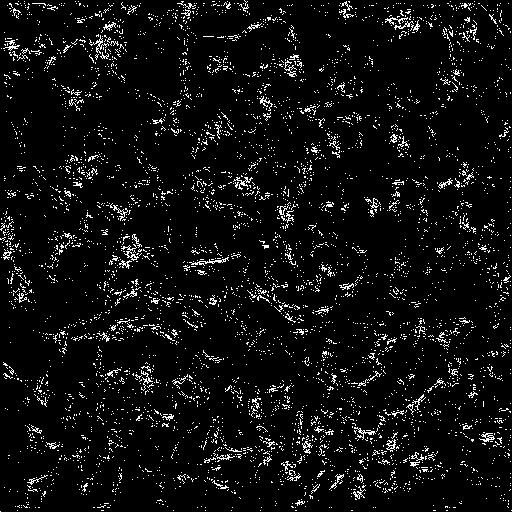

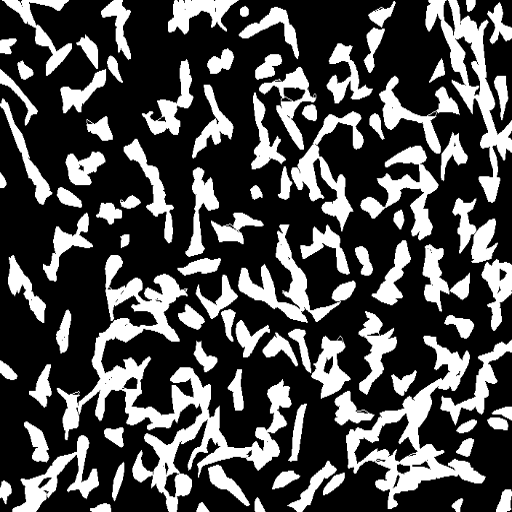

 82%|████████▏ | 50/61 [00:14<00:03,  3.54it/s]

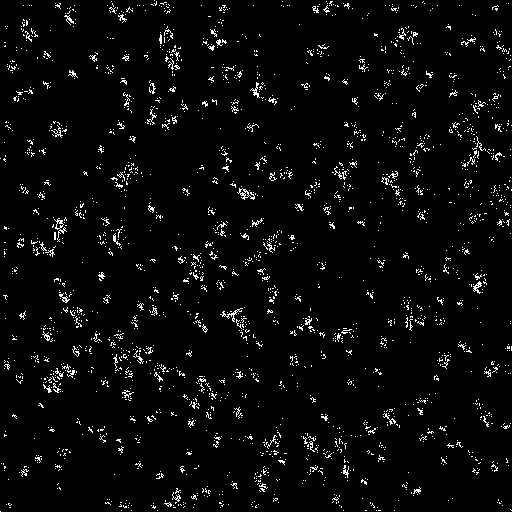

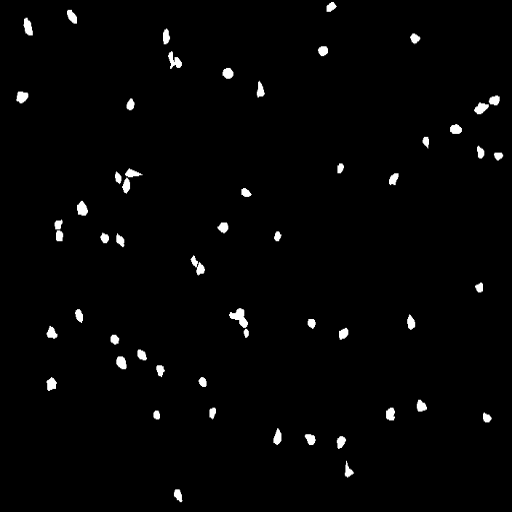

100%|██████████| 61/61 [00:17<00:00,  3.55it/s]



IoU = 0.09822978495151323 Dice = 0.014008600203690625 Accuracy = 0.8791774199570103


In [ ]:
import numpy as np
import torch
from PIL import Image
from torch import nn
import skimage
from skimage import io
from skimage import transform
from skimage import filters
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import SequentialSampler
from tqdm import tqdm
import copy
import pickle

pil = transforms.ToPILImage()

def IoU(outputs, labels):
  outputs = outputs.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  outputs = np.reshape(outputs, (1,-1)) 
  labels = np.reshape(labels, (1,-1))
  intersection = np.logical_and(labels, outputs)
  union = np.logical_or(labels, outputs)
  iou_score = np.sum(intersection) / np.sum(union)
  return iou_score

def dice_score(output, label):
    smooth = 1e-6
    output = output.detach().cpu().numpy()
    label = label.detach().cpu().numpy()
    output = np.reshape(output, (1,-1))
    label = np.reshape(label, (1,-1))
    intersection = np.logical_and(label, output)
    
    return ((2 * np.sum(intersection)) /
              (label.shape[1] + output.shape[1] + smooth))
    
def accuracy_score(outputs, labels):
  outputs = outputs.detach().cpu().numpy()
  labels = labels.detach().cpu().numpy()
  outputs = np.reshape(outputs, (1,-1)) 
  labels = np.reshape(labels, (1,-1))
  intersection = np.logical_and(labels, outputs)
  union = np.logical_or(labels, outputs)
  outputs = 1 - outputs
  labels = 1 - labels
  n_intersection = np.logical_and(labels, outputs)
  acc_score = (np.sum(intersection) + np.sum(n_intersection)) / (np.sum(union) + np.sum(n_intersection))
  return acc_score

model = UNET(4,32)
model.load_state_dict(torch.load('/content/drive/MyDrive/DACO/Results/Unet_1hot_DataAug/model.pth'))

#Path to dataset
root_path = '/content/drive/MyDrive/DACO/Datasets'
#Create transforms and compose
composed_transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((512,512)) ])

#Dataset settings
dataset = SartoriusDataset(root_path, composed_transform, ids_classes)
#dataset = SartoriusDataset(root_path, composed_transform)

idx = [*range(len(dataset))]
training_idx, test_idx = train_test_split(idx, test_size = 0.2, shuffle=False)

test_sampler = SequentialSampler(test_idx)

batch_size = 2
test_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=0)

#Check if GPU is available for training
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
  print("Cuda is available! Training on GPU")
  model.cuda()
else:
  print("Cuda isn't available! Training on CPU")

#Validation loop
model.eval()
print('Testing model...')

t_IoU = 0
t_dice = 0
t_acc = 0

for i, (img,mask) in enumerate(tqdm(test_dataloader)):
  
  if train_on_gpu:
    img, mask = img.cuda(), mask.cuda()

  #Feedforward
  output = model(img.float())

  out = torch.round(torch.sigmoid(output)+0.2)

  #Save IoU and Dice
  for j in range(batch_size):
    t_IoU += IoU(out[j][0],mask[j][0])
    t_dice += dice_score(out[j][0],mask[j][0])
    t_acc += accuracy_score(out[j][0],mask[j][0])

  if i%50 == 0:
    display(pil(out[0][0]))
    print('\n')
    display(pil(mask[0][0]))


#Average IoU and Dice metrics
t_IoU = t_IoU/len(test_dataloader.sampler)
t_dice = t_dice/len(test_dataloader.sampler)
t_acc = t_acc/len(test_dataloader.sampler)

print('\n')
print(f'IoU = {t_IoU} Dice = {t_dice} Accuracy = {t_acc}')

#Test Model

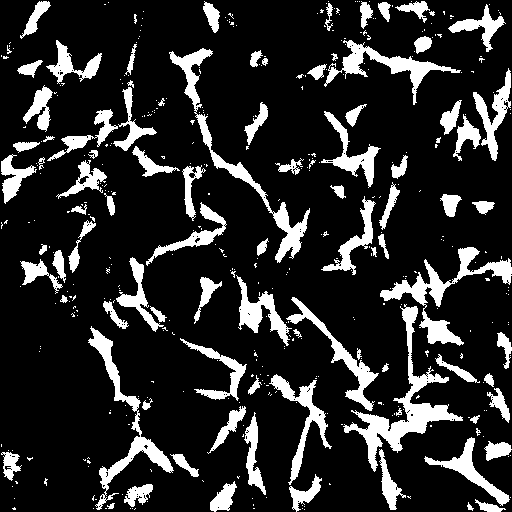

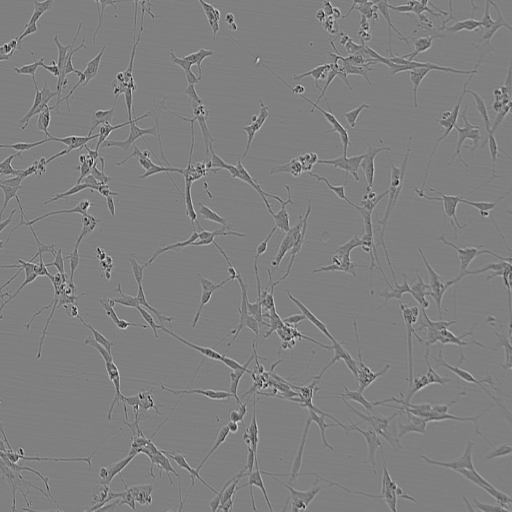

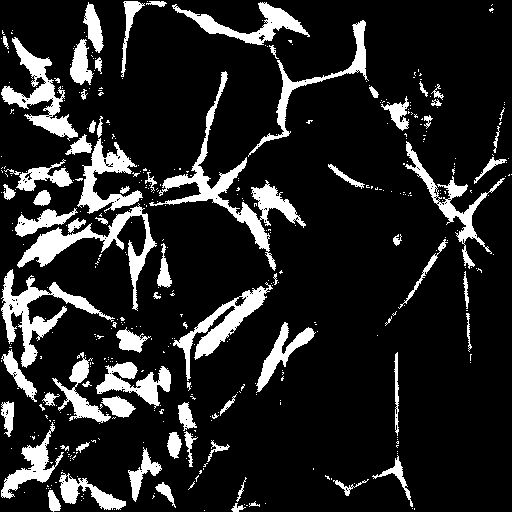

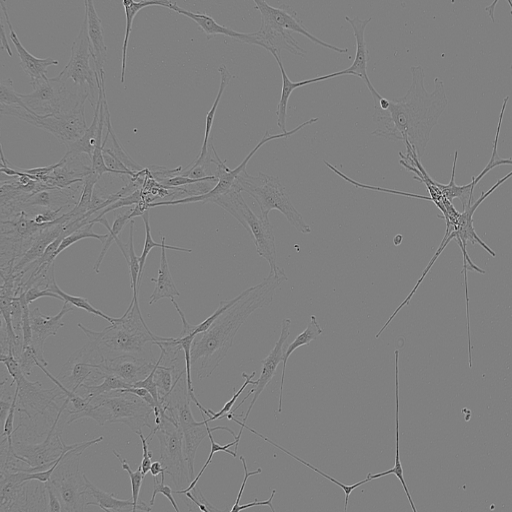

In [ ]:
import torchvision.transforms as transforms
#Path to dataset
root_path = '/content/drive/MyDrive/DACO/Datasets'

#Create transforms and compose
composed_transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((512,512)) ])

#Dataset settings
batch_size = 2
dataset = SartoriusTestDataset(root_path, composed_transform)
test_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

#Load model
model=UNET(3,32);
model.load_state_dict(torch.load('/content/drive/MyDrive/DACO/Results/Unet/model.pth'))
device=('cuda' if torch.cuda.is_available() else 'cpu')
pil= transforms.ToPILImage()
model=model.to(device)
for i, (img) in enumerate(test_dataloader):
    
    img=img.to(device)

    #Feedforward
    with torch.no_grad():
      output = model(img.float())

      #Visualize Image:
      out=pil(torch.round(torch.sigmoid(output[0])))
      display(out)
      print('\n')
      display(pil(img[0].cpu()))
      print('\n')